## Handling Missing Data
Missing data is very common in many data analysis applications. pandas has a great ability to deal with the missing data.

* isnull(), isna(), notnull(), dropna(), fillna(), 

In [1]:
import numpy as np
import pandas as pd

Creating ad dataframe with missing data

In [2]:
data_dic = {'A':[1,2,np.nan,4,np.nan],
            'B':[np.nan,np.nan,1,1,1],
            'C':[11,12,13,14,15],
            'D':[16,np.nan,18,19,20]}
df = pd.DataFrame(data_dic) # dataframe from a dic.

In [3]:
df

,A,B,C,D
0,1.0,NaN,11,16.0
1,2.0,NaN,12,NaN
2,NaN,1.0,13,18.0
3,4.0,1.0,14,19.0
4,NaN,1.0,15,20.0



**isnull(), isna(), notnull() -- Check for missing data in the dataset!**

In [4]:
# isnull() returns True if the data is missing
df.isnull()

,A,B,C,D
0,False,True,False,False
1,False,True,False,True
2,True,False,False,False
3,False,False,False,False
4,True,False,False,False


In [6]:
df.isnull().sum() #column null values count

A    2
B    2
C    0
D    1
dtype: int64

In [6]:
df.isna().sum().sum() #total null value count

5

In [7]:
df['A'].isnull()

0    False
1    False
2     True
3    False
4     True
Name: A, dtype: bool

In [8]:
df['A'].isnull().sum()

2

In [16]:
df.loc[1].sum()

14.0

In [10]:
df.loc[4].isnull().sum() #5th row check 

1

In [9]:
# notnull() returns True for non-NaN values
df.notnull()

,A,B,C,D
0,True,False,True,True
1,True,False,True,False
2,False,True,True,True
3,True,True,True,True
4,False,True,True,True


In [10]:
df.shape

(5, 4)

In [12]:
df.isna().sum() 

A    2
B    2
C    0
D    1
dtype: int64

In [13]:
df.notnull().sum() 

A    3
B    3
C    5
D    4
dtype: int64

In [14]:
df.notnull().sum().sum()

15

In [15]:
df

,A,B,C,D
0,1.0,NaN,11,16.0
1,2.0,NaN,12,NaN
2,NaN,1.0,13,18.0
3,4.0,1.0,14,19.0
4,NaN,1.0,15,20.0


In [16]:
# Sum on Column "A", (NaN as 0)
df['A'].sum()

7.0

&#9758;  We can handle NaN values by multiple ways.... 

In [17]:
df['A'].mean()

2.3333333333333335

**dropna(), fillna() -- Cleaning / filling the missing data**

In [20]:
# drop any row (dafault value) with any NaN value
df.dropna(axis=0)

,A,B,C,D
3,4.0,1.0,14,19.0


In [21]:
# for column, need to tell axis = 1
df.dropna(axis=1)

,C
0,11
1,12
2,13
3,14
4,15


In [22]:
df

,A,B,C,D
0,1.0,NaN,11,16.0
1,2.0,NaN,12,NaN
2,NaN,1.0,13,18.0
3,4.0,1.0,14,19.0
4,NaN,1.0,15,20.0


thresh : int, default None
thresh = 4 means, it will drop any column that have 4 or more than 4 non-NaN values.

In [31]:
df.dropna(thresh=4, axis=1)

,C,D
0,11,16.0
1,12,NaN
2,13,18.0
3,14,19.0
4,15,20.0


We can use fillna() to fill in the values.<br>
inplaced = True [use for permanent change.]

In [32]:
df.fillna(value='a',inplace=True)

In [33]:
df

,A,B,C,D
0,1.0,a,11,16.0
1,2.0,a,12,a
2,a,1.0,13,18.0
3,4.0,1.0,14,19.0
4,a,1.0,15,20.0


In [37]:
df = df.replace('a',3) #a replace by 3

Let's fill in the values using mean of the column. 

In [38]:
df['A'].fillna(value = df['A'].mean())

0    1.0
1    2.0
2    3.0
3    4.0
4    3.0
Name: A, dtype: float64

In [40]:
df

,A,B,C,D
0,1.0,3.0,11,16.0
1,2.0,3.0,12,3.0
2,3.0,1.0,13,18.0
3,4.0,1.0,14,19.0
4,3.0,1.0,15,20.0


In [41]:
df = df.replace(3,np.nan)

In [42]:
df

,A,B,C,D
0,1.0,NaN,11,16.0
1,2.0,NaN,12,NaN
2,NaN,1.0,13,18.0
3,4.0,1.0,14,19.0
4,NaN,1.0,15,20.0


In [43]:
#ffill: Forward fill
df.fillna(method='ffill')

,A,B,C,D
0,1.0,NaN,11,16.0
1,2.0,NaN,12,16.0
2,2.0,1.0,13,18.0
3,4.0,1.0,14,19.0
4,4.0,1.0,15,20.0


In [44]:
#bfill: backward fill
df.fillna(method='bfill')

,A,B,C,D
0,1.0,1.0,11,16.0
1,2.0,1.0,12,18.0
2,4.0,1.0,13,18.0
3,4.0,1.0,14,19.0
4,NaN,1.0,15,20.0


<AxesSubplot:ylabel='Density'>

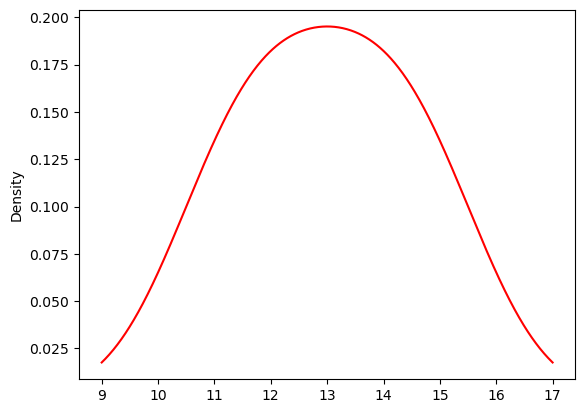

In [49]:
df['C'].plot(kind='kde',color = 'red')

In [50]:
df

,A,B,C,D
0,1.0,NaN,11,16.0
1,2.0,NaN,12,NaN
2,NaN,1.0,13,18.0
3,4.0,1.0,14,19.0
4,NaN,1.0,15,20.0


In [51]:
# fill with you own given value
df.fillna(0, inplace=True)

In [52]:
df

,A,B,C,D
0,1.0,0.0,11,16.0
1,2.0,0.0,12,0.0
2,0.0,1.0,13,18.0
3,4.0,1.0,14,19.0
4,0.0,1.0,15,20.0
